<a href="https://colab.research.google.com/github/SaurabhSRP/4-Vehicle-Insurance-Fraud-Detection/blob/main/Vehicle_Insurance_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
pd.set_option('display.max_columns',None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/SaurabhSRP/4-Vehicle-Insurance-Fraud-Detection/main/fraud_oracle.csv")
df.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  Age          Fault  \
0          Jan                   1  Female        Single   21  Policy Holder   
1          Jan                   4    Male        Single   34  Policy Holder   
2          Nov                   2    Male       Married   47  Policy Holder   
3          Jul                   1    Male       Married   65    Third Party   
4          Feb                   2  Female        Single   27    Third Party   

          PolicyType VehicleCategory     VehiclePrice  FraudFound_P  \
0  Sport - Liability           Sport  more than 69000             0   
1  Sport - Collision           Sport  more than 69000             0   
2  Sport - Collision           Sport  more than 69000             0   
3  Sedan - Liability           Sport   20000 to 29000             0   
4  Sport - Collision           Sport  more than 69000             0   

   PolicyNumber  RepNumber  Deductible  DriverRating Days_Policy_Accident  \
0             1         12         300             1         more than 30   
1             2         15         400             4         more than 30   
2             3          7         400             3         more than 30   
3             4          4         400             2         more than 30   
4             5          3         400             1         more than 30   

  Days_Policy_Claim PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder  \
0      more than 30               none      3 years          26 to 30   
1      more than 30               none      6 years          31 to 35   
2      more than 30                  1      7 years          41 to 50   
3      more than 30                  1  more than 7          51 to 65   
4      more than 30               none      5 years          31 to 35   

  PoliceReportFiled WitnessPresent AgentType NumberOfSuppliments  \
0                No             No  External                none   
1               Yes             No  External                none   
2                No             No  External                none   
3               Yes             No  External         more than 5   
4                No             No  External                none   

  AddressChange_Claim NumberOfCars  Year BasePolicy  
0              1 year       3 to 4  1994  Liability  
1           no change    1 vehicle  1994  Collision  
2           no change    1 vehicle  1994  Collision  
3           no change    1 vehicle  1994  Liability  
4           no change    1 vehicle  1994  Collision

In [ ]:
df.shape

(15420, 33)

In [ ]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

#**Exploratory Data Analysis**

###We will begin with **Categorical features**

In [ ]:
fig=px.pie(df,values=df.index,names='FraudFound_P')
fig.show()

###Here 0 represent 'No_Fraud' and 1 represent 'Fraud'
###Our independent feature is highly imbalanced, and the percentage is shown above in the pie chart.


Lets collect the list of all categorical features and also remove all temporal features as we will do EDA on temporal features later

In [ ]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='object']



In [ ]:
categorical_features

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

In [ ]:
#We will remove date time month data and do EDA separately
remove = ['Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed'] ##we will take date time month data seperately 
for x in remove:
  categorical_features.remove(x)

####Lets check all the unique values and count of all unique values for our categorical data

In [ ]:
for feature in categorical_features:
  fig=px.histogram(df,x=feature,color='FraudFound_P').update_xaxes(categoryorder='total descending')
  fig.show()

####As this a plotly graphs , we can toggle between 0 and 1 , to see their counts in the respective feature by just clicking on the legend


###**Numerical_Features EDA**

In [ ]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='object']

In [ ]:
numerical_features

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'FraudFound_P',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year']

In [ ]:
fig=px.histogram(df,x='Age')
fig.show()

In [ ]:
fig=px.box(df['Age'])
fig.show()

###Age Feature has input as Zero , which we will remove from our dataset 


In [ ]:
fig=px.violin(df,x='Age',color='FraudFound_P',box=True)
fig.show()

###above Violin was plot to check if any specific age group attempted to fraud the insurance provider

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

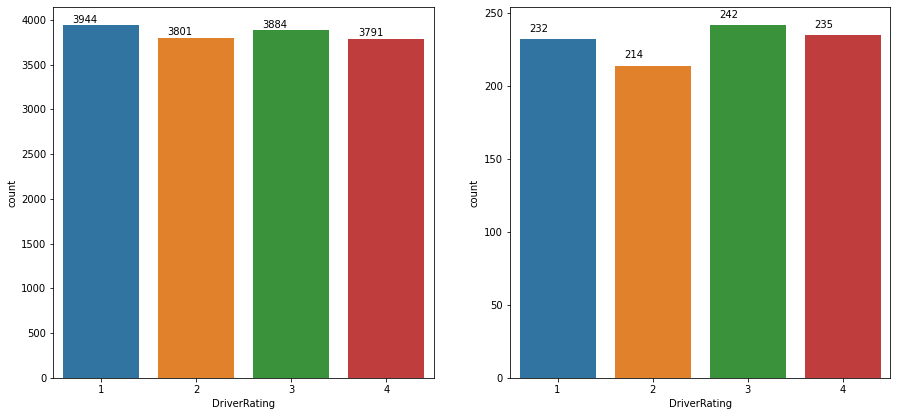

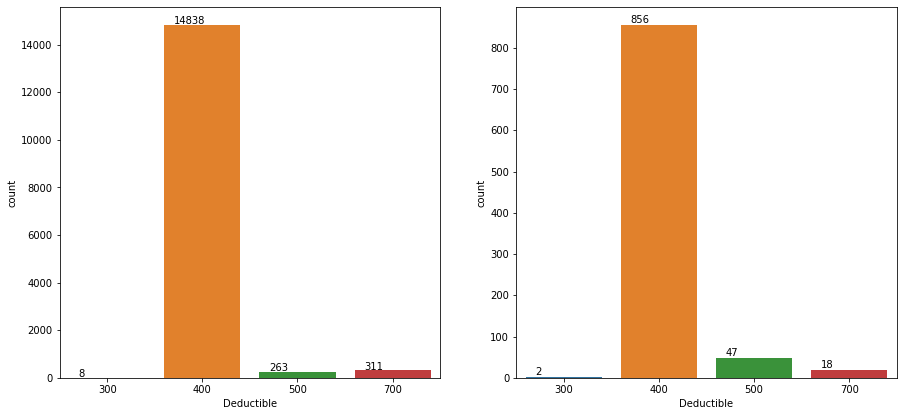

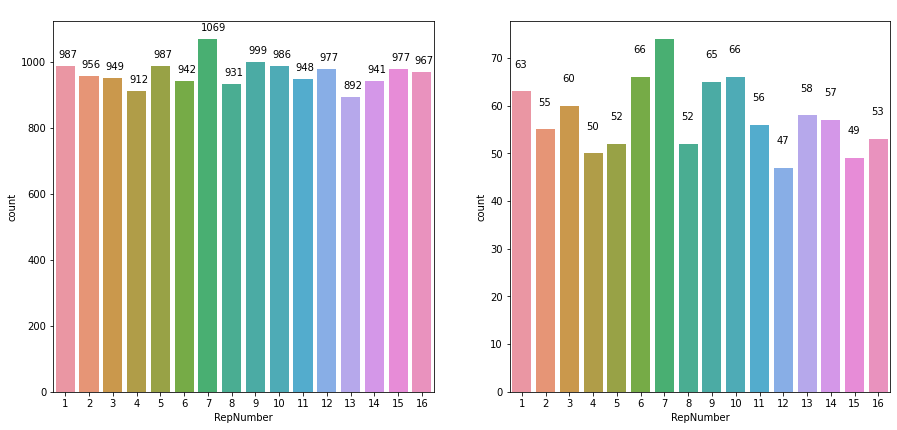

In [ ]:
countplot=['DriverRating','Deductible','RepNumber']
for x in countplot:
  plt.figure(figsize=(15,15))
  plt.subplot(2,2,1)
  ax=sns.countplot(df[x])

  for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+25))

  plt.subplot(2,2,2)
  ay=sns.countplot(df[df['FraudFound_P']==1][x])

  for p in ay.patches:
        ay.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

###As seen above , deductible of 400 is high compared to other deductible


##**Temporal_Features EDA**

In [ ]:
Temporal_features=['Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Year']

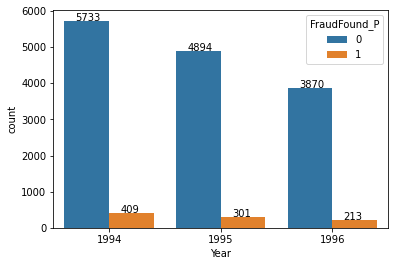

In [ ]:
ay=sns.countplot(x='Year',hue='FraudFound_P',data=df)
for p in ay.patches:
        ay.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

###More frauds were committed in the year 1994 and reduced linearly from 1994 to 1996

In [ ]:
# The month with the most accidents (consider with all years)

df_month = df.groupby("Month").agg({"Month":"count"})
df_month.columns = ["Counts"]
df_month.reset_index(inplace=True)
print(df_month)


fig = px.bar(df_month, x='Month', y='Counts', title="Number of accidents per month")
fig.show()

   Month  Counts
0    Apr    1280
1    Aug    1127
2    Dec    1285
3    Feb    1266
4    Jan    1411
5    Jul    1257
6    Jun    1321
7    Mar    1360
8    May    1367
9    Nov    1201
10   Oct    1305
11   Sep    1240


In [ ]:
# Number of  accidents happened based on  days of week in the month? (consider with all years)

df_month_weekday = df.groupby(["Month", "DayOfWeek"]).agg({"Month":"count"})
df_month_weekday.columns = ["Counts"]
df_month_weekday.reset_index(inplace=True)
print(df_month_weekday.head(10))

fig = px.bar(df_month_weekday, x="Month", y="Counts", color="DayOfWeek",
             pattern_shape="DayOfWeek", pattern_shape_sequence=[".", "x", "+"],
            title = "Number of accident occured on which specific day of the week in a month?")
fig.show()

  Month  DayOfWeek  Counts
0   Apr     Friday     185
1   Apr     Monday     185
2   Apr   Saturday     222
3   Apr     Sunday     161
4   Apr   Thursday     172
5   Apr    Tuesday     176
6   Apr  Wednesday     179
7   Aug     Friday     158
8   Aug     Monday     189
9   Aug   Saturday     118


In [ ]:
# Number of  accidents who had claimed on which on  days of week in the month? (consider with all years)

df_month_weekday = df.groupby(["MonthClaimed", "DayOfWeekClaimed"]).agg({"MonthClaimed":"count"})
df_month_weekday.columns = ["Counts"]
df_month_weekday.reset_index(inplace=True)
print(df_month_weekday.head(10))

fig = px.bar(df_month_weekday, x="MonthClaimed", y="Counts", color="DayOfWeekClaimed",
             pattern_shape="DayOfWeekClaimed", pattern_shape_sequence=[".", "x", "+"],
            title = "Number of  accidents who had claimed on which on  days of week in the month?")
fig.show()

  MonthClaimed DayOfWeekClaimed  Counts
0            0                0       1
1          Apr           Friday     207
2          Apr           Monday     294
3          Apr         Saturday      11
4          Apr           Sunday       2
5          Apr         Thursday     201
6          Apr          Tuesday     305
7          Apr        Wednesday     251
8          Aug           Friday     183
9          Aug           Monday     229


In [ ]:
# Number of accidents by Years and Months

df_year_month = df.groupby(["Year", "Month"]).agg({"Year":"count"})
df_year_month.columns = ["Counts"]
df_year_month.reset_index(inplace=True)
print(df_year_month.head(10))

fig = px.bar(df_year_month, x="Year", y="Counts", color="Month", title="Number of accidents by Years and Months")
fig.show()

   Year Month  Counts
0  1994   Apr     533
1  1994   Aug     470
2  1994   Dec     471
3  1994   Feb     528
4  1994   Jan     608
5  1994   Jul     495
6  1994   Jun     543
7  1994   Mar     584
8  1994   May     569
9  1994   Nov     453


In [ ]:
# Regions where accidents occurred by years
df_area_year = df.groupby(["AccidentArea", "Year"]).agg({"AccidentArea":"count"})
df_area_year.columns = ["Counts"]
df_area_year.reset_index(inplace=True)
print(df_area_year.head(10))


fig = px.bar(df_area_year, x="Year", y="Counts",
             color='AccidentArea', barmode='group',
             height=400,
            title = "Regions where accidents occurred by year")
fig.show()

  AccidentArea  Year  Counts
0        Rural  1994     642
1        Rural  1995     536
2        Rural  1996     420
3        Urban  1994    5500
4        Urban  1995    4659
5        Urban  1996    3663


###Urban area had more accidents compared to rural areas

##**Feature Engineering**

In [ ]:
##Remove all records where Age=0
df.drop(df[df['Age']==0].index,inplace=True)

In [ ]:
categorical_features

['Make',
 'AccidentArea',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

In [ ]:
# Import label encoder 
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
# Encode labels in for all categorical Features
for feature in categorical_features:
  df[feature]=encoder.fit_transform(df[feature])
df.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday     6             1          Tuesday   
1   Jan            3  Wednesday     6             1           Monday   
2   Oct            5     Friday     6             1         Thursday   
3   Jun            2   Saturday    17             0           Friday   
4   Jan            5     Monday     6             1          Tuesday   

  MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  Age  Fault  \
0          Jan                   1    0              2   21      0   
1          Jan                   4    1              2   34      0   
2          Nov                   2    1              1   47      0   
3          Jul                   1    1              1   65      1   
4          Feb                   2    0              2   27      1   

   PolicyType  VehicleCategory  VehiclePrice  FraudFound_P  PolicyNumber  \
0           5                1             5             0             1   
1           4                1             5             0             2   
2           4                1             5             0             3   
3           2                1             0             0             4   
4           4                1             5             0             5   

   RepNumber  Deductible  DriverRating  Days_Policy_Accident  \
0         12         300             1                     3   
1         15         400             4                     3   
2          7         400             3                     3   
3          4         400             2                     3   
4          3         400             1                     3   

   Days_Policy_Claim  PastNumberOfClaims  AgeOfVehicle  AgeOfPolicyHolder  \
0                  2                   3             1                  2   
1                  2                   3             4                  3   
2                  2                   0             5                  5   
3                  2                   0             6                  6   
4                  2                   3             3                  3   

   PoliceReportFiled  WitnessPresent  AgentType  NumberOfSuppliments  \
0                  0               0          0                    3   
1                  1               0          0                    3   
2                  0               0          0                    3   
3                  1               0          0                    2   
4                  0               0          0                    3   

   AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                    0             2  1994           2  
1                    3             0  1994           1  
2                    3             0  1994           1  
3                    3             0  1994           2  
4                    3             0  1994           1

Drop policyNumber and year columns and perform label encoder for temporal features


In [ ]:
df.drop(['Year','PolicyNumber'],axis=1,inplace=True)

In [ ]:
Month_map={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
Week_map={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [ ]:
df['Month']=df['Month'].map(Month_map)
df['DayOfWeek']=df['DayOfWeek'].map(Week_map)
df['DayOfWeekClaimed']=df['DayOfWeekClaimed'].map(Week_map)
df['MonthClaimed']=df['MonthClaimed'].map(Month_map)


In [ ]:
df.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     6             1                 2   
1      1            3          3     6             1                 1   
2     10            5          5     6             1                 4   
3      6            2          6    17             0                 5   
4      1            5          1     6             1                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  Age  Fault  \
0             1                   1    0              2   21      0   
1             1                   4    1              2   34      0   
2            11                   2    1              1   47      0   
3             7                   1    1              1   65      1   
4             2                   2    0              2   27      1   

   PolicyType  VehicleCategory  VehiclePrice  FraudFound_P  RepNumber  \
0           5                1             5             0         12   
1           4                1             5             0         15   
2           4                1             5             0          7   
3           2                1             0             0          4   
4           4                1             5             0          3   

   Deductible  DriverRating  Days_Policy_Accident  Days_Policy_Claim  \
0         300             1                     3                  2   
1         400             4                     3                  2   
2         400             3                     3                  2   
3         400             2                     3                  2   
4         400             1                     3                  2   

   PastNumberOfClaims  AgeOfVehicle  AgeOfPolicyHolder  PoliceReportFiled  \
0                   3             1                  2                  0   
1                   3             4                  3                  1   
2                   0             5                  5                  0   
3                   0             6                  6                  1   
4                   3             3                  3                  0   

   WitnessPresent  AgentType  NumberOfSuppliments  AddressChange_Claim  \
0               0          0                    3                    0   
1               0          0                    3                    3   
2               0          0                    3                    3   
3               0          0                    2                    3   
4               0          0                    3                    3   

   NumberOfCars  BasePolicy  
0             2           2  
1             0           1  
2             0           1  
3             0           2  
4             0           1

In [ ]:
##Define independent and dependent variables
X=df.drop('FraudFound_P',axis=1)
y=df['FraudFound_P']

In [ ]:
print(X.shape)
print(y.shape)

(15100, 30)
(15100,)


In [ ]:
##Splitting the dataset into Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
##Feature scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


#**Create ANN**

In [ ]:
###Lets Create the ANN
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout 
from keras.activations import relu, sigmoid


In [ ]:
##Lets initialise the ANN 
classifier=Sequential()

In [ ]:
##Adding the input layer
classifier.add(Dense(units=20,activation='relu',input_dim=30)) 

In [ ]:
##Adding the first hidden layer
classifier.add(Dense(units=10,activation='relu'))


##adding the second Hidden layer
classifier.add(Dense(units=5,activation='relu'))

##Output layer 
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
##Early stopping #when accuracy is not incrasing we will do early stopping automatically 
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=25,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 891
Trainable params: 891
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##Train neural network
model_history=classifier.fit(X_train,y_train,validation_split=0.3,batch_size=100,epochs=50,callbacks=early_stopping)

Epoch 1/50
85/85 [==============================] - 5s 11ms/step - loss: 0.3349 - accuracy: 0.8906 - val_loss: 0.2003 - val_accuracy: 0.9401
Epoch 2/50
85/85 [==============================] - 1s 8ms/step - loss: 0.1859 - accuracy: 0.9410 - val_loss: 0.1926 - val_accuracy: 0.9401
Epoch 3/50
85/85 [==============================] - 1s 8ms/step - loss: 0.1796 - accuracy: 0.9410 - val_loss: 0.1909 - val_accuracy: 0.9401
Epoch 4/50
85/85 [==============================] - 1s 8ms/step - loss: 0.1757 - accuracy: 0.9410 - val_loss: 0.1908 - val_accuracy: 0.9401
Epoch 5/50
85/85 [==============================] - 1s 7ms/step - loss: 0.1727 - accuracy: 0.9410 - val_loss: 0.1940 - val_accuracy: 0.9401
Epoch 6/50
85/85 [==============================] - 1s 7ms/step - loss: 0.1701 - accuracy: 0.9410 - val_loss: 0.1964 - val_accuracy: 0.9401
Epoch 7/50
85/85 [==============================] - 1s 8ms/step - loss: 0.1693 - accuracy: 0.9410 - val_loss: 0.1975 - val_accuracy: 0.9401
Epoch 8/50
85/85 [=

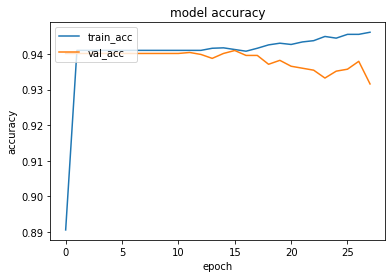

In [ ]:
##SUmmarize history for accuracy 
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'],loc='upper left')
plt.show()

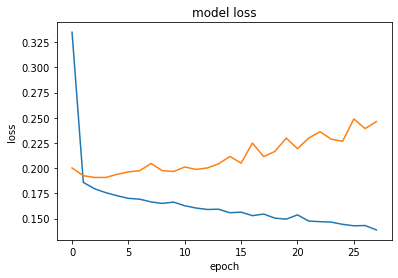

In [ ]:
##Summarize history for loss 
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

##The validation dataset loss is increasing, That means our dataset is **OverFitting**
##It  can be due to 
###Imbalanced dataset as in our case
###Too many features which are not important for this model

In [ ]:
##Part 3 - Making the prediction and evaluatting the model

##Prediction the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

95/95 [==============================] - 0s 1ms/step


In [ ]:
##make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[2800,   44],
       [ 167,    9]])

In [ ]:
##calculate the accuracy score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.9301324503311258

#**This was my First ANN project**
#**Though the model is overfitting , i feel these are possible solution to reduce the validation loss**
###**1) Oversampling our data as its imbalanced**
###**2) Only considering important features and not all**
###**3) Tweaking the learning rate, epochs and batch size**
###**4) Adding or Reducing the hidden neuron and hidden layers**
###**5) Tweaking the learning rate, epochs and batch size**


